In [1]:
import time
import tracemalloc


class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    
    def add_elem(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.add_elem(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.add_elem(data)
        else:
            self.data = data
        

    def del_elem(self, data):
        if self.data:
            if self.data > data:
                if self.left:
                    self.left.del_elem(data)
            else:
                tmp = self.left
                self.left = Node(data)
                if tmp:
                    data = tmp
                    self.del_elem(data)
                
        elif self.data < data:
            if self.right:
                self.right.del_elem(data)
            else:
                tmp = self.right
                self.right = Node(data)
                if tmp:
                    data = tmp
                    self.del_elem(data)
        
        else:
            self.data = None    
                    

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        if self.data is not None:
            print(self.data, end=" ")
        if self.right:
            self.right.PrintTree()


def time_memory(func, *args):
    start_time = time.time()
    tracemalloc.start()
    func(*args)
    time.sleep(1)
    end_time = time.time()
    tracemalloc.stop()
    current_memory = tracemalloc.get_traced_memory()
    t = end_time - start_time - 1
    print("Time Usage:", t)
    print("Memory Usage:", current_memory)
    return t, current_memory




In [2]:
arr = Node(100)

add1 = time_memory(arr.add_elem, 99)
time_memory(arr.add_elem, 100)
time_memory(arr.add_elem, 1)
time_memory(arr.add_elem, 10)
time_memory(arr.add_elem, 111)

arr.PrintTree()

Time Usage: 0.0008897781372070312
Memory Usage: (0, 0)
Time Usage: 0.0006945133209228516
Memory Usage: (0, 0)
Time Usage: 0.0011913776397705078
Memory Usage: (0, 0)
Time Usage: 0.0011429786682128906
Memory Usage: (0, 0)
Time Usage: 0.0009827613830566406
Memory Usage: (0, 0)
1 10 99 100 111 

In [3]:
del1 = time_memory(arr.del_elem, 0)
time_memory(arr.PrintTree)

Time Usage: 0.0015034675598144531
Memory Usage: (0, 0)
1 10 99 100 111 Time Usage: 0.0007843971252441406
Memory Usage: (0, 0)


(0.0007843971252441406, (0, 0))

In [4]:
# Inserting a key on a B-tree in Python


# Create a node
class BTreeNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []


# Tree
class BTree:
    def __init__(self, t):
        self.root = BTreeNode(True)
        self.t = t

    # Insert node
    def insert(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            self.root = temp
            temp.child.insert(0, root)
            self.split_child(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    # Insert nonfull
    def insert_non_full(self, x, k):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k[0] < x.keys[i][0]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k[0] < x.keys[i][0]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k[0] > x.keys[i][0]:
                    i += 1
            self.insert_non_full(x.child[i], k)
        self.last_key = k
    # Split the child
    def split_child(self, x, i):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

    # Print the tree
    def print_tree(self, x, l=0):
        print("Level ", l, " ", len(x.keys), end=":")
        for i in x.keys:
            print(i, end=" ")
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)
    
    def delete(self, x, k):
        t = self.t
        i = 0
        while i < len(x.keys) and k[0] > x.keys[i][0]:
            i += 1
        if x.leaf:
            if i < len(x.keys) and x.keys[i][0] == k[0]:
                x.keys.pop(i)
                return
            return

        if i < len(x.keys) and x.keys[i][0] == k[0]:
            return self.delete_internal_node(x, k, i)
        elif len(x.child[i].keys) >= t:
            self.delete(x.child[i], k)
        else:
            if i != 0 and i + 2 < len(x.child):
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                elif len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i == 0:
                if len(x.child[i + 1].keys) >= t:
                    self.delete_sibling(x, i, i + 1)
                else:
                    self.delete_merge(x, i, i + 1)
            elif i + 1 == len(x.child):
                if len(x.child[i - 1].keys) >= t:
                    self.delete_sibling(x, i, i - 1)
                else:
                    self.delete_merge(x, i, i - 1)
            self.delete(x.child[i], k)




B = BTree(3)

# Insert elements
for i in range(5):
   add2 = time_memory(B.insert, (i, 2 * i))
    

# Print the B-Tree
print("Tree after insertions:")
B.print_tree(B.root)

print("\nDeleting last element\n")
del2 = time_memory(B.delete, B.root, (i, 2 * i))

# Print the B-Tree after deletions
print("\nTree after deletions:")
B.print_tree(B.root)

Time Usage: 0.0008749961853027344
Memory Usage: (0, 0)
Time Usage: 0.0008902549743652344
Memory Usage: (0, 0)
Time Usage: 0.00038242340087890625
Memory Usage: (0, 0)
Time Usage: 0.0004374980926513672
Memory Usage: (0, 0)
Time Usage: 0.00037789344787597656
Memory Usage: (0, 0)
Tree after insertions:
Level  0   5:(0, 0) (1, 2) (2, 4) (3, 6) (4, 8) 

Deleting last element

Time Usage: 0.0008058547973632812
Memory Usage: (0, 0)

Tree after deletions:
Level  0   4:(0, 0) (1, 2) (2, 4) (3, 6) 


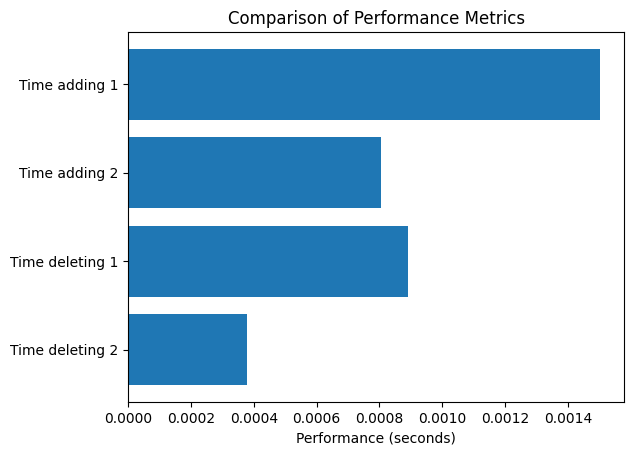

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming del1, del2, add1, and add2 contain your data in lists
float_del1 = del1[0]
float_del2 = del2[0]
float_add1 = add1[0]
float_add2 = add2[0]

# Data and labels
vars = ('Time adding 1', 'Time adding 2', 'Time deleting 1', 'Time deleting 2')
y_pos = np.arange(len(vars))  # Positions for bars
performance = (float_del1, float_del2, float_add1, float_add2)  # Performance values

# Create the bar chart
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center')  # Error bars are not used here

# Set labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(vars)  # Use set_yticklabels instead of set_yticks for custom labels
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Performance (seconds)')  # Assuming performance represents time
ax.set_title('Comparison of Performance Metrics')

# Show the plot
plt.show()
